## Predicting Employee Attrition with Classification

### Context: 
McCurr Healthcare Consultancy is an MNC that has thousands of employees spread out across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources are spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

### Objective : 

* To identify the different factors that drive attrition
* To make a model to predict if an employee will attrite or not


### Dataset :
The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

** In the real world, you will not find definitions for some of your variables. It is a part of the analysis to figure out what they might mean. 

### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [ ]:
#reading the dataset
import pandas as pd
import requests
from io import StringIO  

orig_url="https://drive.google.com/file/d/147Z67u4-bp_ZVlbc18dg6J3h9ORRlCcW/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
employees = pd.read_csv(csv_raw)
employees.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Printing the info

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observation:**
- There are 2940 observations and 33 columns.
- All the column have 2940 non-null values i.e. there are no missing values in the data.

**Let's check the unique values in each column** 

In [ ]:
#checking unique values in each column
employees.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observation:**
- Employee number is an identifier which is unique for each employee and we can drop this column as it would not add any value to our analysis.
- Over18 and StandardHours have only 1 unique value. These column will not add any value to our model hence we can drop them.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

Let's drop the columns mentioned above and define lists for numerical and categorical columns to explore them separately.

In [ ]:
#dropping the columns 
employees=employees.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
#Creating numerical columns
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

#Creating categorical variables 
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

### Let's start with univariate analysis of numerical columns

In [ ]:
#Checking summary statistics
employees[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 km radius** from the organization. However there are some extreme values, seeing as the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **Average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike 14% or less, with the maximum salary hike being 25%.
- Average number of years an employee is associated with the company is 7. 
- **On average, the number of years since an employee got a promotion is 2.18**. The majority of employees have been promoted since the last year.

Let's explore these variables in some more depth by observing their distributions

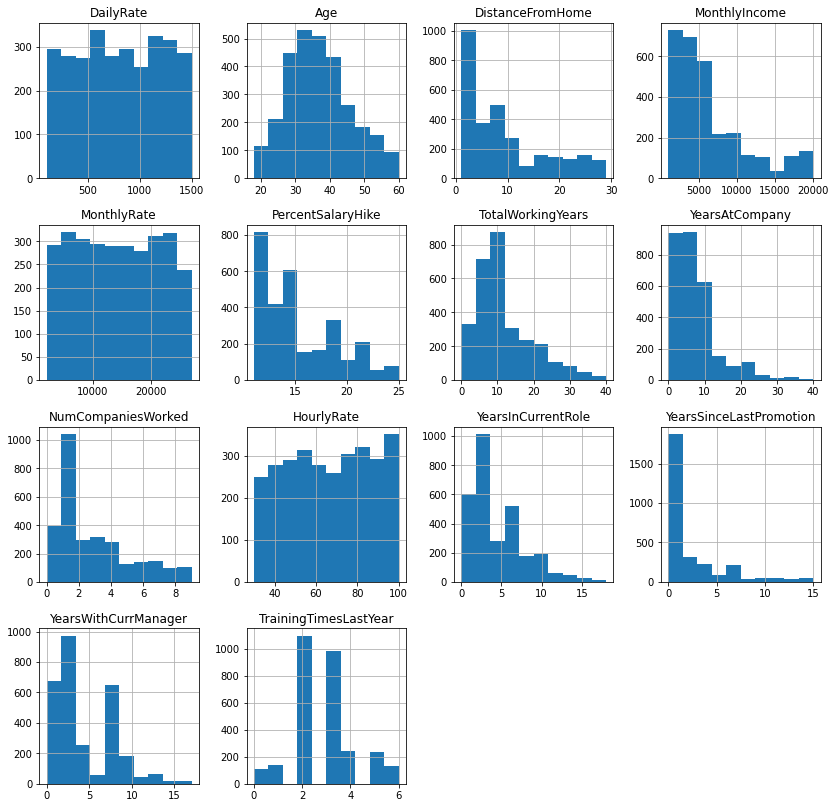

In [ ]:
#creating histograms
employees[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of employees between the ages of 25 and 50.

- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increases.

- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.

- **DistanceFromHome also has a right skewed distribution**, meaning most employees live close to work but there are a few that live further away.

- **On average, an employee has worked at 2.5 companies.** Most employees have worked at only 1 company.

- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization. 

- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.

- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees and the like.

- The distributions of DailyRate, HourlyRate and MonthlyRate appear to be uniform and do not provide much information. It could be that daily rate refers to the income earned per extra day worked while hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similiar for multiple employees in the same department, that explains the uniform distribution they show. 

### Univariate analysis for categorical variables

In [ ]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(employees[i].value_counts(normalize=True)) # This expresses the results as proportions rather than counts.
    print('*'*40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

**Problem 1 - Data Summary Observations:**

- **1.a.** The employee attrition rate is **16%.**
- Around 28% of the employees are working overtime.  **Implications: This suggests that there could be a problem with work-life balance in the company. High rates of overtime may lead to stress.**

- 71% of the employees have traveled rarely, while around 19% have to travel frequently.

- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields. 

- **1.b.** Over **----%** of employees work in the Research & Development department of the organization.

- **1.c.** Nearly **----%** of the employees have low (1) or medium-low (2) job satisfaction and environment satisfaction in the organization. **Implications: ------**

- **1.d.** Over **----%** of the employees show low (1) to medium-low (2) job involvement. 

- **1.e.** Over **----%** of the employees either have none or very less stock options. 

- In terms of performance ratings, none of the employees have rated lower than 3 (excellent). About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenerio is that the organization could be highly lenient with its performance appraisal process.

### Bivariate and Multivariate analysis

**We have analyzed different categorical and numerical variables.** 

**Let's now check how does attrition rate is related with other categorical variables**

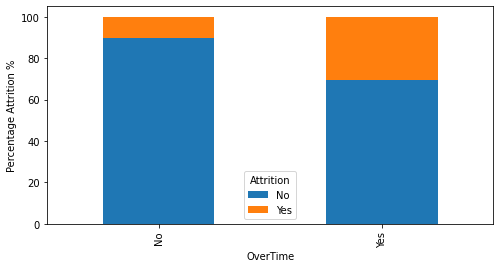

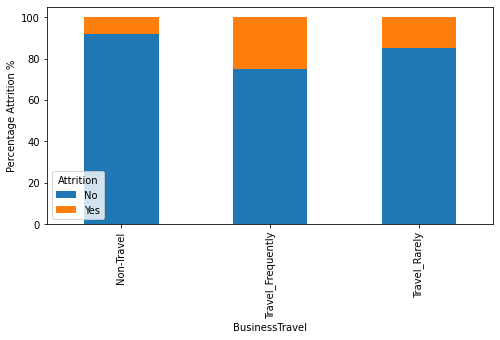

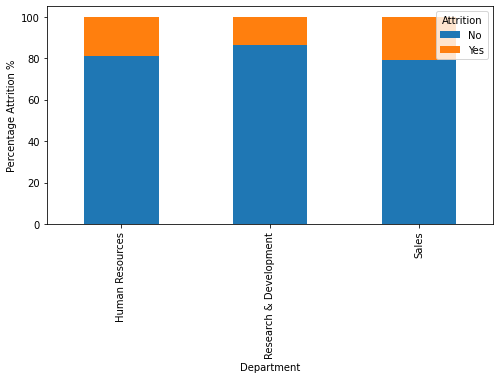

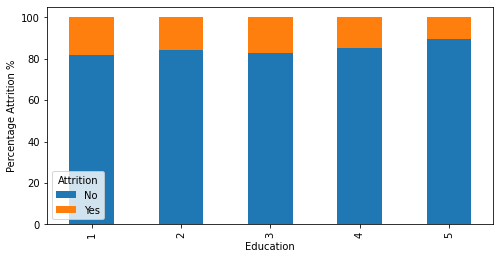

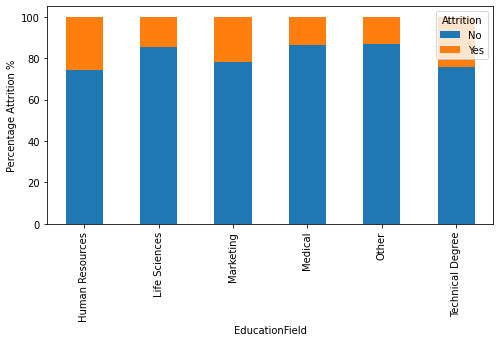

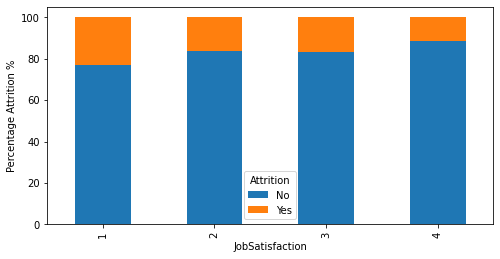

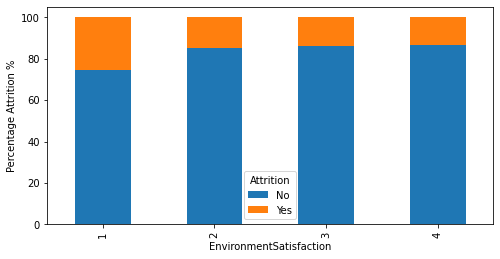

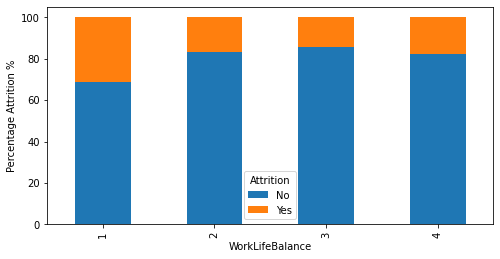

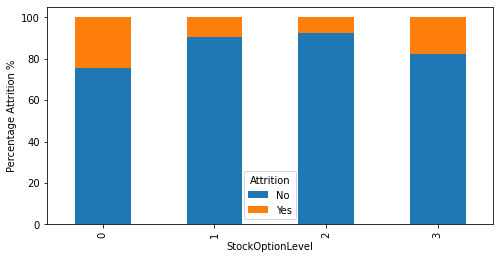

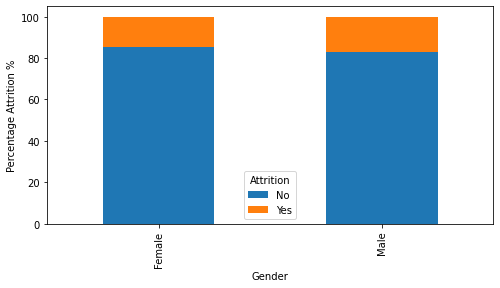

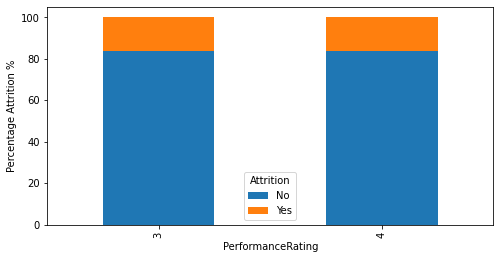

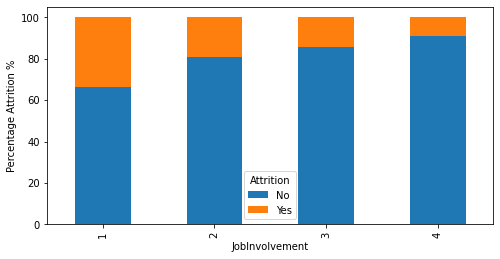

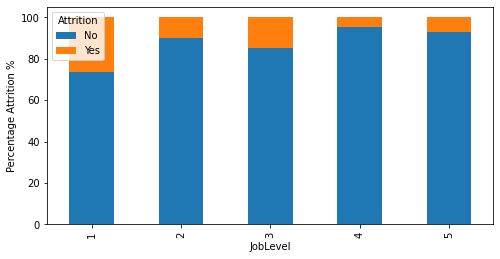

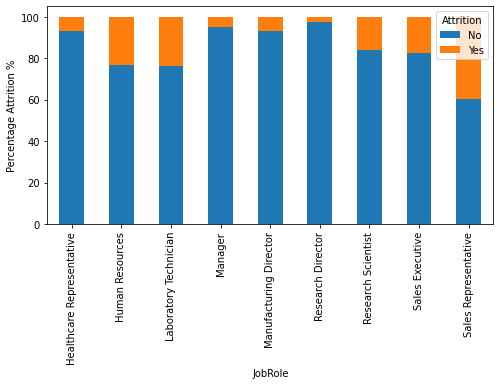

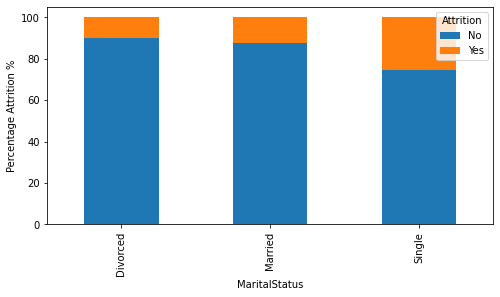

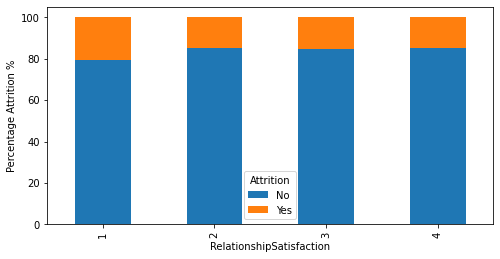

In [ ]:
for i in cat_cols:
    if i!='Attrition':
        (pd.crosstab(employees[i],employees['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Attrition %')

**Problem 2 - Categorical Variable Observations:**
    
- **2.a.** Employees working overtime have more than a **----%** chance of attrition, 
which is very high compared to the **----%** chance of attrition for employees who do not work extra hours.
    
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~15%
     
- **2.b.** Employees working as sales representatives have an attrition rate of around **----%** while HRs and Technicians have an attrition rate of around **----%**. **Implications: -----**
    
- The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%. The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
     
- **2.c.** Employees at a lower job level also attrite more, with 1-rated JobLevel employees showing a nearly 25% chance of attrition. **Implications: -----**
   
- **2.d.** A low work-life balance rating clearly leads employees to attrite; **----%** of those in the 1-rated category show attrition.

**Let's check the relationship between attrition and Numerical variables**

In [ ]:
#Mean of numerical varibles grouped by attrition
employees.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Problem 3 - Quantitative Data Observations:**
- **3.a.** Employees leaving the company have a nearly 30% lower average income and 30% less work experience than those who are not. **Implications: -----**
    
- **3.b.** Employees showing attrition also tend to live 16% further from the office than those who are not. **Implications: -----**

**We have found out what kind of employees are leaving the company more.**

### Let's check the relationship between different numerical variables

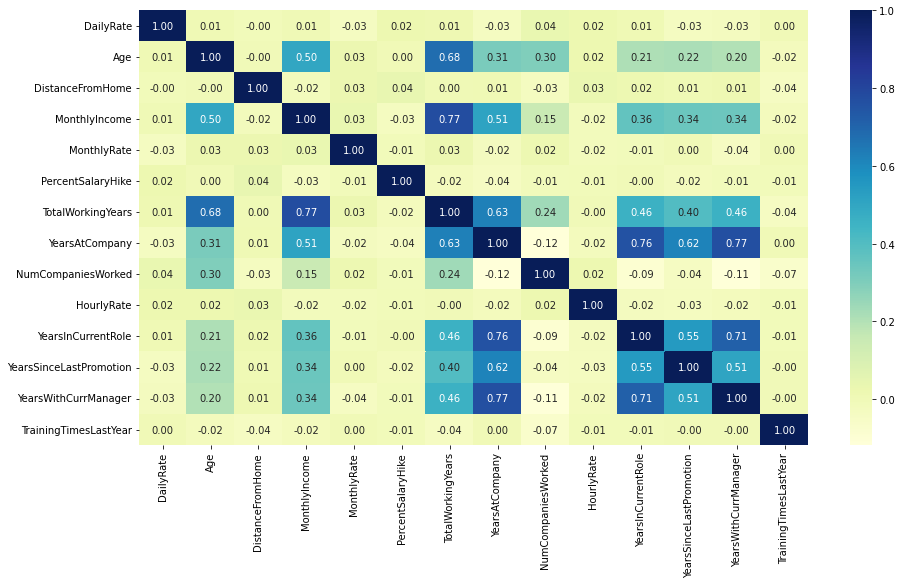

In [ ]:
#plotting the correation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(employees[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Problem 4 - Correlation Analysis:**

- **4.a.** **-----, -----, ----- and -----** are highly correlated with each other and with **employee age** which is easy to understand as these variables show an increase with age for most employees. 
   
- **4.b.** **----- and -----** are correlated with **years since last promotion** which means that the company is not giving promotions at the right time.

**Now that we have explored our data. Let's build the model**

## Model Building - Approach
1. Prepare data for modeling
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

###  Preparing data for modeling

**Creating dummy variables for categorical Variables**

In [ ]:
#creating list of dummy columns
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

#creating dummy variables
employees = pd.get_dummies(data = employees, columns= to_get_dummies_for, drop_first= True)      

#mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}


employees['OverTime'] = employees.OverTime.map(dict_OverTime)
employees['Attrition'] = employees.Attrition.map(dict_attrition)

**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
#Separating target variable and other variables
Y= employees.Attrition
X= employees.drop(columns = ['Attrition'])

### Splitting the data into 70% train and 30% test set

In [ ]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

### Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite and the employee actually attrites

#### Which case is more important? 
* **Predicting that the employee will not attrite but the employee attrites** i.e. losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor, and is hence the more important case of wrong predictions.

#### How to reduce this loss i.e the need to reduce False Negatives?
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall (minimizing the false negatives) or in other words identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control attrition rate especially for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [ ]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Building the model

We will be building a single model:
- **Classification Tree**



- Tree induction is a supervised segmentation algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. The data is recursively partitioned to achieve maximum homogeneity of partitions (minimal entropy) with respect to the target variable.


In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 8
dt = DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
# Fit dt to the training set
dt.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
y_pred = dt.predict(x_test)
y_pred[:6]

array([0, 1, 0, 0, 0, 0])

**Checking Model Performance**

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1726
           1       0.97      0.71      0.82       332

    accuracy                           0.95      2058
   macro avg       0.96      0.85      0.90      2058
weighted avg       0.95      0.95      0.95      2058



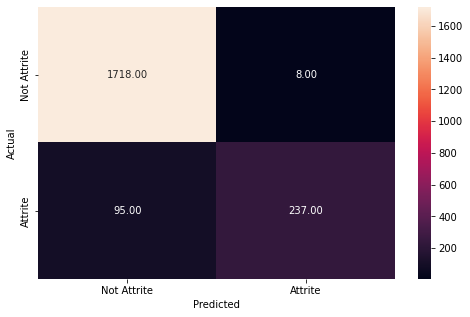

In [ ]:
#checking model performace of dt
y_pred_train_dt = dt.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       740
           1       0.69      0.54      0.61       142

    accuracy                           0.89       882
   macro avg       0.80      0.75      0.77       882
weighted avg       0.88      0.89      0.88       882



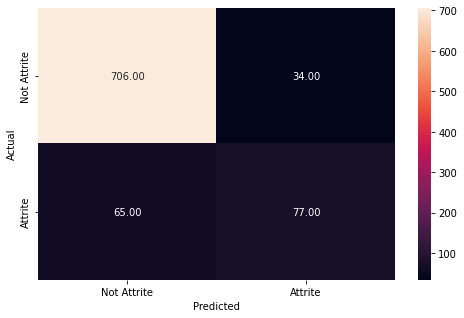

In [ ]:
#checking model performace of dt
y_pred_test_dt = dt.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the employees at risk of attrition.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that an employee would not attrite and the employee does not attrite 

* False Positive (Actual=0, Predicted=1): Model predicts that an employee would attrite but the employee does not attrite

* False Negative (Actual=1, Predicted=0): Model predicts that an employee would not attrite but the employee attrites

* True Positive (Actual=1, Predicted=1): Model predicts that an employee would attrite and the employee actually attrites

**Observations:**
- The model is performing well in terms of accuracy.
- The recall for class 1 is quite low (```54%```), which implies that this model will not perform well in differentiating out the employees who have a high chance of leaving the company, and hence this model would not help reduce the attrition rate. 
- The model also has a somewhat low precision (```69%```). A precision of ~0.70 suggests that there is a 30% (1 - 0.70) chance that the model will predict that a person is going to leave even though he/she would not, and the company would waste their time and energy on these employees who are not at risk of attrition.

### Feature Importance

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': dt.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
5,MonthlyIncome,0.170471
8,OverTime,0.100399
3,HourlyRate,0.069340
13,TotalWorkingYears,0.061483
1,DailyRate,0.060270
15,WorkLifeBalance,0.055674
17,YearsInCurrentRole,0.052963
0,Age,0.043628
12,StockOptionLevel,0.039736
18,YearsSinceLastPromotion,0.039416


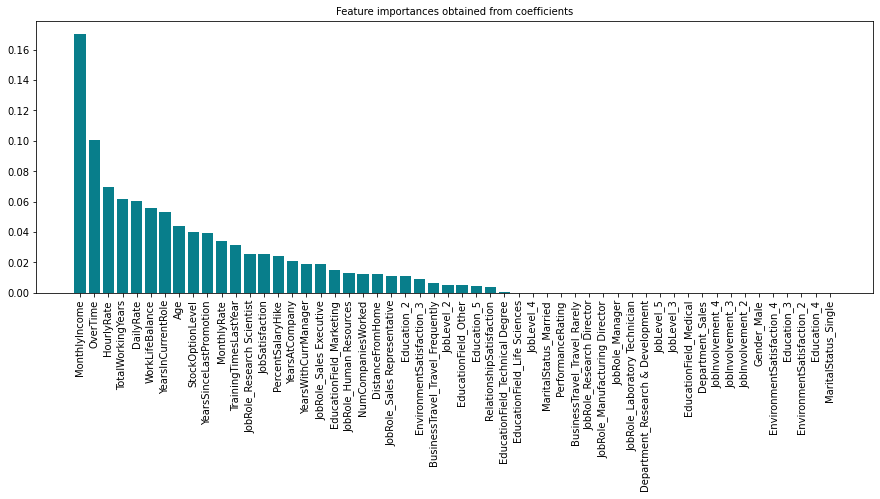

In [ ]:
#define figure size in (width, height) for a single plot
plt.figure(figsize=(15,5))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

### Conclusion and Recommendations 

**Conclusions:**

- The classification tree was **able to identify some key factors involved with high attrition** in the organization. In a real-world setting, additional models would be attempted (Logistic Regression, Linear Discriminant, Support Vector Machines, etc.). Models would be systematically compared in order to select the one with the best performance. These techniques will be developed later in the course. 


**Problem 5 - Recommendations:**

- **A higher monthly income might lower the chance of an employee attriting.** The company should make sure that all of its employees are compensated at least based on industry standards.

(provide 4 to 5 additional recommendations, in the style of the example above, to the company based on the complete analysis of the data)
     
- **----**
- **----**
- **----**
- **----**
- **----**

